<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exo_3p92_et_2p102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercice 3p92

In [0]:
data_credit = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 3p92 et 2p102/credit.pkl")
data_credit['A16'].loc[(data_credit["A16"]=="+")] = 1
data_credit['A16'].loc[(data_credit["A16"]=="-")] = 0
data_credit.head(5)

C:\Users\Tommy\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


Question 1

In [0]:
X = data_credit.drop(['A16'],axis=1)
Y = data_credit['A16']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=2018)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

Question 2

In [0]:
from sklearn.neural_network import MLPClassifier
NN1 = MLPClassifier(hidden_layer_sizes=(10,8),activation='logistic',solver='lbfgs',max_iter=500,random_state=2018)
NN1.fit(X_train_scale,Y_train.values.ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
Y_pred = NN1.predict(X_test_scale)
Y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

Question 3

In [0]:
from sklearn.metrics import accuracy_score ,roc_auc_score, auc
Y_pred = NN1.predict(X_test_scale)
print("accuracy :",accuracy_score(Y_test,NN1.predict(X_test_scale)))

accuracy : 0.8536585365853658


Question 4

In [0]:
print("auc :",roc_auc_score(Y_test,NN1.predict_proba(X_test_scale)[:,1]))

auc : 0.8050455291834601


Question 5

In [0]:
from sklearn.neural_network import MLPClassifier
NN2 = MLPClassifier(hidden_layer_sizes=(10,5,8),activation='logistic',solver='lbfgs',random_state=2018)
NN2.fit(X_train_scale,Y_train.values.ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Question 6

In [0]:
from sklearn.metrics import accuracy_score ,roc_auc_score, auc
Y_pred = NN2.predict(X_test_scale)
print("accuracy :",accuracy_score(Y_test,NN2.predict(X_test_scale)))

accuracy : 0.8475609756097561


Question 7

In [0]:
print("auc :",roc_auc_score(Y_test,NN2.predict_proba(X_test_scale)[:,1]))

auc : 0.7928048962531721


Question 8

In [0]:
#C'est l'algo d'optimisation

Question 9

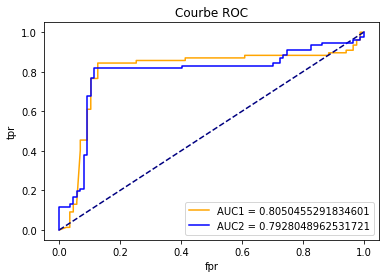

In [0]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(Y_test,NN1.predict_proba(X_test_scale)[:,1])

fpr2, tpr2, thresholds2 = roc_curve(Y_test,NN2.predict_proba(X_test_scale)[:,1])

from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,color='orange',label='AUC1 = '+str(auc(fpr1,tpr1)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.plot(fpr2,tpr2,color='blue',label='AUC2 = '+str(auc(fpr2,tpr2)))
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.show()

# Exercice 2p102

Question 1

In [0]:
data_insurance = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 3p92 et 2p102/insurance.pkl")
data_insurance.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [0]:
X = data_insurance.drop(['charges'],axis=1)
Y = data_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=2003)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

Question 2

In [0]:
from sklearn.neural_network import MLPRegressor
NN1 = MLPRegressor(hidden_layer_sizes=(10,10),activation='relu',solver='lbfgs',max_iter=1000,random_state=2000)
NN1.fit(X_train_scale,Y_train.values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
Y_pred = NN1.predict(X_test_scale)

Question 3

In [0]:
from sklearn.metrics import mean_absolute_error,r2_score
print('MAE :'+str(mean_absolute_error(Y_test,NN1.predict(X_test_scale))))
print('R2 :'+str(r2_score(Y_test,NN1.predict(X_test_scale))))

MAE :2862.6076909711837
R2 :0.84135145178816


Question 4 a)

In [0]:
NN1.coefs_[1][2]

array([ 7.80327611, 20.0002578 , 13.31034652, -0.68632835, -0.44365492,
       -0.7202278 , -0.94833811, -0.04849164, 17.30163149, -0.3995933 ])

Question 4 b)

In [0]:
NN1.coefs_[1][2][4]

-0.4436549248775546

Question 4 c)

In [0]:
NN1.intercepts_[1]

array([ -34.76449274, -185.54142176,  -98.83681629,   -5.148955  ,
         -1.84406998,   -4.51997388,   -4.58137876,   -1.45008098,
       -140.78909634,   -2.91647957])

Question 4 d)

In [0]:
NN1.intercepts_[2]

array([4.94622485])

Question 5)

In [0]:
Ni=11
No=10
Ns=len(X_train)
alpha = 5

Nh=Ns/(alpha*(Ni+No))
Nh

10.19047619047619

Question 6)

In [0]:
hiden = [(o,i) for o in range(11,20) for i in range(11,20)]
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
parameters = {'hidden_layer_sizes':hiden,\
'activation':['relu'],\
'solver':['lbfgs'],'random_state':[2000],'max_iter':[800]}
NN1 = MLPRegressor()
clf = GridSearchCV(NN1, parameters,scoring='r2',cv=5)
clf.fit(X_train_scale,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...
                                                (11, 14), (11, 15), (11, 16),
                                                (11, 17), (11, 18), (11, 19),
                                                (12, 11), (12, 12), (12, 13),
                                                (12, 14), (12, 15), (12, 16),
                

In [0]:
print("meilleur score :",clf.best_score_)

meilleur score : 0.825689057916035


In [0]:
print("Meilleurs paramètres :",clf.best_params_)

Meilleurs paramètres : {'activation': 'relu', 'hidden_layer_sizes': (14, 18), 'max_iter': 800, 'random_state': 2000, 'solver': 'lbfgs'}


Question 7

In [0]:
NN_best = MLPRegressor(**clf.best_params_)
NN_best.fit(X_train_scale,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(14, 18), learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Question 8

In [0]:
from sklearn.metrics import mean_absolute_error,r2_score
print('R2 :'+str(r2_score(Y_test,NN_best.predict(X_test_scale))))

R2 :0.8602536185971017
